In [1]:
from project_test_victor import colorization
import numpy as np
result = colorization(learning_rate=0.0001, n_epochs=100,
                    verbose=True,batch_size=1,ds_rate=1,dim_in=256/1)

Using gpu device 0: GeForce GTX TITAN X (CNMeM is enabled with initial size: 50.0% of memory, cuDNN 4007)


(200L, 65536L)
Current training data size is 200
Current validation data size is 200
Current test data size is 200
... building the model
<CudaNdarrayType(float32, vector)>
Shape.0
... training
('training @ iter = ', 0L)
epoch 1, minibatch 1/200, validation error 12128807.812500 %
('training @ iter = ', 200L)
epoch 2, minibatch 1/200, validation error 12072200.000000 %
('training @ iter = ', 400L)
epoch 3, minibatch 1/200, validation error 11996067.187500 %
('training @ iter = ', 600L)
epoch 4, minibatch 1/200, validation error 11883340.625000 %
('training @ iter = ', 800L)
epoch 5, minibatch 1/200, validation error 11726318.750000 %
('training @ iter = ', 1000L)
epoch 6, minibatch 1/200, validation error 11519712.500000 %
('training @ iter = ', 1200L)
epoch 7, minibatch 1/200, validation error 11261089.062500 %
('training @ iter = ', 1400L)
epoch 8, minibatch 1/200, validation error 10949094.531250 %
('training @ iter = ', 1600L)
epoch 9, minibatch 1/200, validation error 10584257.812

In [9]:
#[test_out,bw_input,prior_boost.output,data_ab_enc]
result[0][0,:,:,:]-result[3][0,:,:,:]

array([[[  1.86542911e-03,   5.07506775e-04,   1.25923310e-04, ...,
           1.56230101e-06,   7.61733327e-06,   3.56557342e-04],
        [  6.78096607e-04,   3.16156147e-05,   2.76928995e-06, ...,
           2.25612062e-09,   2.28087753e-08,   1.30951148e-05],
        [  4.51824773e-04,   1.37916995e-05,   1.11378472e-06, ...,
           2.67524314e-09,   1.73279240e-08,   8.88649265e-06],
        ..., 
        [  2.15683991e-04,   1.78166265e-05,   1.73064891e-05, ...,
           6.50773990e-10,   4.67427874e-09,   3.86077136e-06],
        [  2.40657449e-04,   2.47333046e-05,   2.52436021e-05, ...,
           1.38541834e-09,   1.79279738e-08,   1.08929653e-05],
        [  1.00607995e-03,   3.33933363e-04,   3.50134127e-04, ...,
           1.07896324e-06,   6.70095142e-06,   2.93781894e-04]],

       [[  2.44195457e-03,   7.81032722e-04,   2.14667860e-04, ...,
           2.92383993e-06,   1.13381238e-05,   3.15849407e-04],
        [  1.25109078e-03,   8.88760042e-05,   1.01857522e-0

In [14]:
from project_nn import dec_net_out_to_rgb
print(np.shape(result[0]))
dec_net_out_to_rgb(result[0][0,:,:,:],result[1][0,:,:,:])

(1L, 313L, 64L, 64L)


ValueError: total size of new array must be unchanged

In [34]:
image_net_out = result[3][0,:,:,:]
data_l = result[1][0,:,:,:]
ref_Qcolor_bins = np.load('pts_in_hull.npy')
data_ab = np.dot((image_net_out.transpose(1,2,0)).reshape(4096,313), ref_Qcolor_bins)
data_a_chan = (data_ab[:,0]).reshape(1,64,64)
data_b_chan = (data_ab[:,1]).reshape(1,64,64)
img_construct = np.concatenate((data_a_chan, data_b_chan), axis=0)
img_construct = np.concatenate((data_l[:,::4,::4]+50, img_construct), axis=0)

C:\Users\V\Anaconda2\lib\site-packages\skimage\color\colorconv.py:901: UserWarning: Color data out of range: Z < 0 in 151 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)


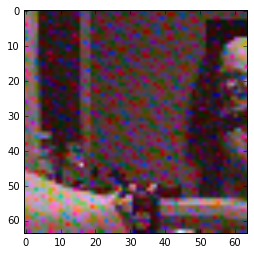

In [35]:

from matplotlib import pyplot as plt
from skimage import color, io,measure
%matplotlib inline
plt.imshow(color.lab2rgb(img_construct.transpose(1,2,0)))
plt.show()

In [ ]:
import numpy as np
from project_test_mehmet import load_data
from project_util import encode_ab_to_Q 

data_set = load_data('data', False)
data_a_chan = data_set[1][219][:64*64]
data_b_chan = data_set[1][219][64*64:2*64*64]
distances, indices, wts = encode_ab_to_Q(data_a_chan, data_b_chan)

In [ ]:
img_enc = np.zeros((64*64, 313 ))
x_ind =np.arange(0,4096,dtype='int')[:,np.newaxis]
img_enc[x_ind, indices] = wts
img_flt = img_enc.flatten()
print img_flt.reshape(4096,313)[0]

In [ ]:
import urllib2
from bs4 import BeautifulSoup
import os, sys
from PIL import Image
from resizeimage import resizeimage
import numpy as np
from matplotlib import pyplot as plt
from skimage import color, io
import theano
%matplotlib inline

data_l = ((result[0][3]).reshape(1,256,256)).transpose(1,2,0)
data_ab_y = ((result[1][3]).reshape(2,256,256)).transpose(1,2,0)
data_ab_nn = ((result[2][3]).reshape(2,256,256)).transpose(1,2,0)
img_construct = np.concatenate((data_l.astype(np.float64),data_ab_nn.astype(np.float64)), axis=2)
plt.imshow(color.lab2rgb(img_construct))
plt.show()

In [ ]:
rng = numpy.random.RandomState(23455)
    
new_path = './data/'
if not os.path.isdir(new_path):
    download_images(dir_name, 3)
    prepare_image_sets(dir_name, batch_size=200)
#train_set, valid_set, test_set = 
train_set = load_data(dir_name,theano_shared=False)